# Комментарий от ревьюера

~~Иван, добрый день! Меня зовут Влада, я посмотрела твой проект — в целом, неплохо, но есть некоторые ошибки. Ниже в файле ты найдешь мои комментарии: <font color='green'>зеленый цвет — «все отлично»; </font> <font color='blue'>синий — «хорошо, но можно лучше»; </font> <font color='red'>красный — «нужно исправить».</font> Комментарии в самом коде я отделяю знаками «###».~~

~~Иван, спасибо! Осталось всего одно замечание. Комментарии выделены цветом, как раньше.~~

Спасибо за доработки! Иван, теперь все в порядке :)

# Комментарий от ученика
1. Влада, добрый день! 
Внес исправления в соответствии с замечаниями. Под красным текстом указал ответы.
Но есть вопросы, они внизу. Заранее благодарен за ответы)

2. Добрый день! Исправления внесены, вопросы написал ниже. ЗАранее благодарю за ответы.

# Описание проекта

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

# 1. Загрузка и подготовка данных

In [20]:
                             import numpy as np
from numpy.random            import RandomState
                             import pandas as pd
                             import seaborn as sns
                             import matplotlib.pyplot as plt
                             import scipy as st
from scipy.stats             import shapiro , normaltest
from sklearn.model_selection import train_test_split

from sklearn.linear_model    import LinearRegression
from sklearn.tree            import DecisionTreeRegressor 
from sklearn.metrics         import mean_squared_error




In [21]:
# 1-й регион
df_0 = pd.read_csv('/datasets/geo_data_0.csv')

# Информация о выборке
df_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


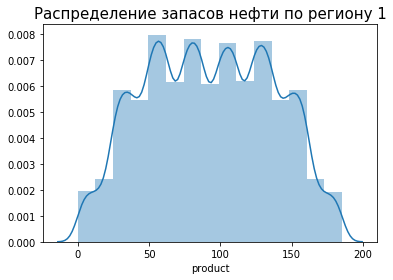

In [22]:
ax=sns.distplot(df_0['product'] , bins = 15);
ax.set_title('Распределение запасов нефти по региону 1' , fontdict = {'fontsize':15});

In [23]:
# 2-й регион
df_1 = pd.read_csv('/datasets/geo_data_1.csv')

# Информация о выборке
df_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


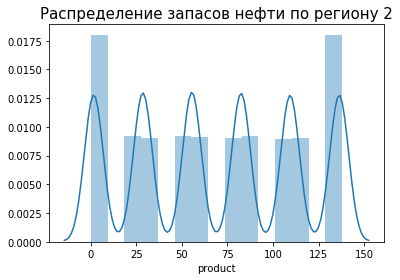

In [24]:
ax=sns.distplot(df_1['product'], bins = 15);
ax.set_title('Распределение запасов нефти по региону 2' , fontdict = {'fontsize':15});

In [25]:
len(df_1['product'].unique())

12

In [26]:
# 3-й регион
df_2 = pd.read_csv('/datasets/geo_data_2.csv')

# Информация о выборке
df_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


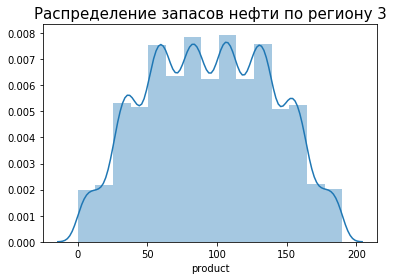

In [27]:
ax=sns.distplot(df_2['product'] , bins = 15);
ax.set_title('Распределение запасов нефти по региону 3' , fontdict = {'fontsize':15} );

### Вывод по этапу:
Как видно по графикам запасов нефти по регионам распределение запасов 1-го и 3-го близко к нормальному. Распределение 2-го региона не нормально, при этом в таблице всего 12 уникальных значений.

<font color='blue'>Все верно, но вид распределения сильно зависит от числа столбиков (bins) в гистограмме: если их задать меньше, то для региона 1 и 3 распределение будет похоже на нормальное. Альтернативный вариант – воспользоваться функцией df[...].plot.kde() для получения сглаженного графика распределения. </font>

<font color='blue'>~~Признак id является неинформативным, и ты его не используешь – про это лучше написать. ~~  </font> Ответ: дополнено в выводе следующего раздела


# 2. Обучение и проверка модели

In [28]:
# Функция для моделирования
def modeling(data):
    x = data[['f0', 'f1' , 'f2']]
    y = data['product']
    x_train , x_valid , y_train , y_valid = train_test_split(x , y , test_size = 0.25 , random_state = 12)
    model = LinearRegression(normalize = False)
    model.fit(x_train , y_train)
    predictions = model.predict(x_valid)
    return y_valid , predictions 

In [29]:
# Результаты 1-го региона
y_0 , y_pred_0 = modeling(df_0)

rmse_0 = mean_squared_error(y_0 , y_pred_0)**0.5
print('Регион 1: RMSE / Запасы нефти, тыс.бар. : {:.2f}/ {:.2f}' .format(rmse_0 , df_0['product'].mean()))

# Результаты 2-го региона
y_1 , y_pred_1 = modeling(df_1)
rmse_1 = mean_squared_error(y_1 , y_pred_1)**0.5
print('Регион 2: RMSE / Запасы нефти, тыс.бар. : {:.2f}/ {:.2f}' .format(rmse_1 , df_1['product'].mean()))


# Результаты 3-го региона
y_2 , y_pred_2 = modeling(df_2)
rmse_2 = mean_squared_error(y_2 , y_pred_2)**0.5
print('Регион 3: RMSE / Запасы нефти, тыс.бар. : {:.2f}/ {:.2f}' .format(rmse_2 , df_2['product'].mean()))




Регион 1: RMSE / Запасы нефти, тыс.бар. : 37.79/ 92.50
Регион 2: RMSE / Запасы нефти, тыс.бар. : 0.89/ 68.83
Регион 3: RMSE / Запасы нефти, тыс.бар. : 39.80/ 95.00


<font color='green'>Здорово, что не дублируешь код. Все значения правильные, молодец. </font>


### Вывод по проверке моделей:
Признаками были приняты столбцы f0 , f1 , f2. Столбец id является уникальным для каждой скважины, поэтому его не рассматриваем.
Целевым признаком принят столбец product. 
 

Для анализа данных согласно условию принята модель линейной регрессии, которая вызывается методом LinearRegression()  в модуле sklearn. Модель была обучена на 75% процентах данных и проверена на выборке из 25% данных. 
Для оценки качества моделей использована метрика RMSE, которая определяется как корень из среднеквадратичной ошибки между предсказанными и реальными значениями. Лучше всего модель сработала для 2-го региона: RMSE составляет 0,89; при этом средний запас нефти составляет 68,83 тыс.бар., что меньше, чем в 1-м и 3-м регионах.

<font color='green'>Совершенно верно. </font>


# 3. Подготовка к расчёту прибыли

In [30]:
HOLES_NUMBER = 500  # Количество скважин для разведки
BUDGET = 1e10       # Бюджет на разработку месторождений — 10 млрд рублей,
HOLE_COST = 5e7     # Стоимость бурения одной скважины — 50 млн рублей.
BAREL_PROFIT = 4500 # Прибыль  в рублях от одного барелля

# Количество скважин, которые можно разработать при бюджете
holes_research_num = int( BUDGET / HOLE_COST)

#Минимальный объем сырья 
min_reserve = BUDGET / (BAREL_PROFIT * holes_research_num*1000)
print("Количество скважин, которые можно разработать при данном бюджете: " ,  holes_research_num)
print("Минимальный средний объём сырья, тыс. бар.: {: .2f}".format(min_reserve))

Количество скважин, которые можно разработать при данном бюджете:  200
Минимальный средний объём сырья, тыс. бар.:  11.11


<font color='blue'>~~Константы лучше называть заглавными буквами: BUDGET и т.п.~~ </font>

<font color='green'>Количество скважин найдено верно. </font>

<font color='red'>~~Чему равен минимальный средний объем сырья в месторождениях региона, достаточный для его разработки? То есть сколько должно быть найдено сырья, чтобы покрыть стоимость бурения скважины (получить нулевую прибыль)?~~</font> /Ответ: Минимальный объем сырья добавлен 

<font color='green'>Спасибо, все правильно. </font>


<font color='red'>~~Лучшие скважины – это те, у которых наибольший предсказанный запас сырья prediction (а не разница между истинным значением и предсказанным). В реальности мы не знаем истинного значения, а если бы знали, то модель вообще не нужна бы была :) ~~</font> / Ответ: спасибо! Осознал) смутило наличие известных значений валидационной выборки. Ячейка с этим кодом удалена


In [31]:
# Функция для определения прибыли
def profit_search(y , y_pred):
    profit = []      
    data = pd.DataFrame({"target":y , "predictions":y_pred})    
    for _ in range(0,1000):
    # делаем выборки по 500 скважин  1000раз 
        sample_500 = data.sample(HOLES_NUMBER , 
                                 replace = True , 
                                      ) ### replace=True, так как выборка должны быть с возвращением  
        sample_200 = sample_500.sort_values(by ='predictions' , ascending = False).head(200) # Выбираем 200 максимальных значений  
        profit_200 = ((sample_200['target'].sum() * 1000 * BAREL_PROFIT) - BUDGET )/ 1e9   # Считаем прибыль от 200 скважин в млрд. руб.       
        profit.append(profit_200)
    
    # возвращаем  список прибылей
    return profit

<font color='red'>~~В цикле 1000 раз нужно делать следующее. Сэмплировать с возвращением (replace=true) 500 объектов из валидационной выборки. Среди них выбирать 200 лучших (с наибольшим предсказанным значением). После этого вычислять прибыль, которую мы получим, если будем бурить скважины в этих 200 точках.~~</font>

Ответ: выполнено в функциию. Вопрос: выбор максимальных предсказанных значений кажется странным, т.к. заведомо максимизирует запасы и соответственно прибыль. Почему выбираются максимальные значения?

<font color='green'>Максимизация прибыли и является целью, разве не так? :) «Заведомая максимизация запасов» будет происходить только если наша модель предсказаний идеальна.</font>

<font color='red'>~~Поправь, пожалуйста, функцию profit_search: в строке, где ты вычисляешь profit_200 должны принимать участие ИСТИННЫЕ запасы нефти (то есть «y», соответствующие 200 лучшим месторождениям «sample_200»). Ведь «y» отвечает за то, какое количество нефти мы добудем, пробурив скважины в этих 200 точках. ~~</font>

<font color='red'>~~Будь внимателен с индексами: индексы у «y» и «y_pred» должны совпадать. Возможно, для этого придется выполнить *.reset_index(drop=True).~~</font>

Ответ: Исправлено. Но не понятно почему берем запас из реальных скважин, а не из предсказанных моделью.
Ведь по идее должно быть так: пробурили скважину - взяли пробу - проанализировали, получили признаки - загрузили в модель - получили предсказанный запас в скважине.

<font color='green'>Признаки месторождений получают до бурения скважин. На основании их значений выбирают 200 лучших точек (с максимальным предсказанным запасом). Бурение скважин и происходит в этих 200 точках (бюджета хватает только на 200 шт). До бурения скважин нельзя сказать, сколько на самом деле мы обнаружим сырья и какую прибыль мы получим (так как наша модель предсказаний, естественно, может ошибаться). Истинные запасы нефти, которые мы обнаружим, и принесут нам деньги, а не предсказанные :) Прибыль зависит именно от «y», а не от «y_pred».</font>


<font color='red'>~~По 1000 полученным значениям прибыли найти среднюю прибыль, 95% доверительный интервал, риск убытков (долю отрицательных значений прибыли). ~~</font>

Ответ: выполнено в следующем разделе, выведено на печать.

<font color='red'>~~Для расчета прибыли стоит написать функцию, принимающую на вход истинные и предсказанные значения объемов сырья. Прибыль – это разница между тем, сколько мы получим, пробурив скважины в 200 точках с наибольшим prediction, и потраченными деньгами на бурение скважин.~~</font>

Ответ: выполнено в функции как указано в твоем замечании. НО! тогда неправильно называть 4500руб прибылью, это доход от скважин.

<font color='green'>Согласна, это может вносить путаницу. Прибыль, которую мы вычисляем, еще называют операционной прибылью. </font>


In [32]:
# Записываем список прибылей для каждого региона в переменные
profit_0 = profit_search(y_0 , y_pred_0)
profit_1 = profit_search(y_1 , y_pred_1)
profit_2 = profit_search(y_2 , y_pred_2)


### Вывод по этапу:
 - на основании известного бюджета и стимости разработки одной скважины определено достаточное и необходимое количество скважин - 200 шт.
 - минимальный запас скважины в точке безубыточности определяем как бюджет, деленный на прибыль от 200 скважин. Таким образом получаем минимальный запас павный 11.1 тыс. бар.
 - для определения средней прибыли написана функция profit_search(), которая выполняет следующее:  
     - методом библиотеки numpy выбирает случайным образом 500 месторождений из валидационной выборки; <font color='red'>~~(из валидационной выборки, а не из предсказанных моделью. Модель предсказывает объем запасов в месторождениях, а не сами месторождения)~~</font>     
     Ответ: исправлено. 

     - из 500 месторождений определяет 200 лучших, т.е. с максимальным предсказанным запасом нефти; <font color='red'>~~(с максимальным предсказанным запасом нефти)~~</font>
     
     Ответ: исправлено.

     - считает прибыль от 200 месторождений, равную разности полученного дохода и затраченного бюджета;
     - пункты повторяются 1000 раз и прибыль от 200 скважин записывается в список.
     - функция возвращает список прибылей, посчитанных 1000 раз.
 - результаты работы фунцкции записаны в переменные.

<font color='green'>Отлично, схема расчета прибыли, в целом, верная. </font>


# 4. Расчёт прибыли и рисков 

In [33]:
# Подготовим данные для графиков паспределения прибыли
data_profit = pd. DataFrame({'region_1':profit_0 , 'region_2':profit_1 ,'region_3':profit_2 })
data_profit_tranformed = pd.melt(data_profit)
data_profit_tranformed.columns = ['region' , 'profit']

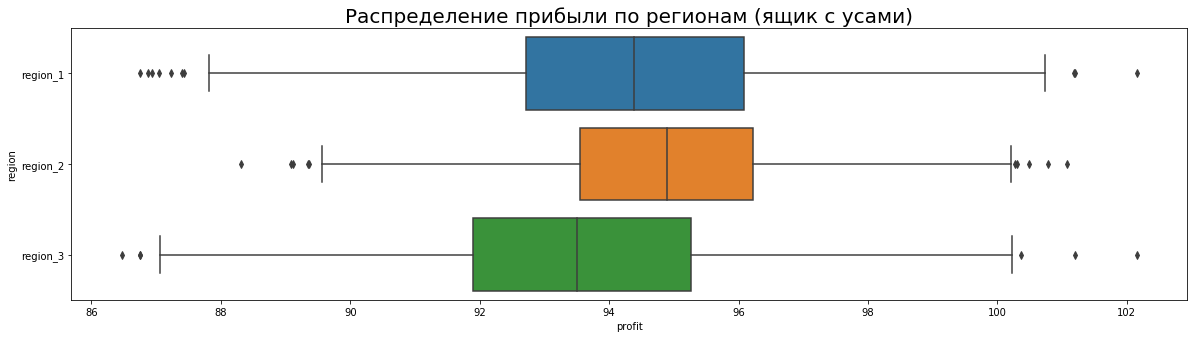

In [34]:
# Распределение прибыли для всех регионов
plt.figure(figsize=(20,5)) 
ax = sns.boxplot(x="profit", y="region" , data = data_profit_tranformed);
ax.set_title('Распределение прибыли по регионам (ящик с усами)' , fontdict = {'fontsize':20});

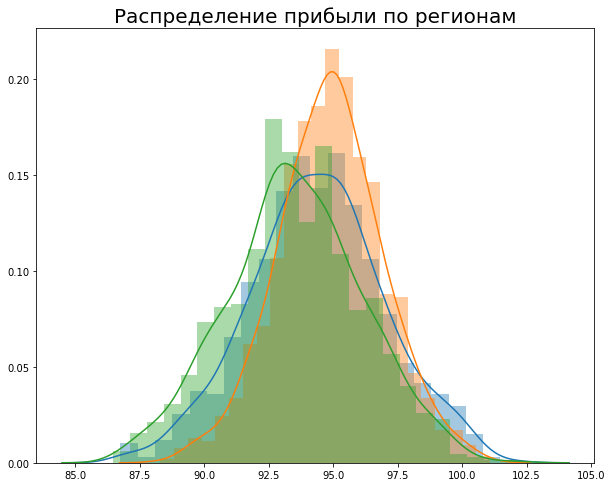

In [35]:
# Распределение прибыли для всех регионов
plt.figure(figsize=(10,8))
sns.distplot(profit_0)
sns.distplot(profit_1)
sns.distplot(profit_2)
plt.title('Распределение прибыли по регионам' , fontsize =20)
plt.show()

In [36]:
# Средняя прибыль 1-го региона
mean_profit_0 = sum(profit_0)/ len(profit_0)
print("Средняя прибыль для 1-го региона, млрд. руб: {:.2f}".format(mean_profit_0))

# Средняя прибыль 2-го региона
mean_profit_1 = sum(profit_1)/ len(profit_1)
print("Средняя прибыль для 2-го региона, млрд. руб: {:.2f}".format(mean_profit_1))

# Средняя прибыль 3-го региона
mean_profit_2 = sum(profit_2)/ len(profit_2)
print("Средняя прибыль для 3-го региона, млрд. руб: {:.2f}".format(mean_profit_2))

Средняя прибыль для 1-го региона, млрд. руб: 94.38
Средняя прибыль для 2-го региона, млрд. руб: 94.89
Средняя прибыль для 3-го региона, млрд. руб: 93.54


In [37]:
# Определяем 95% интервал прибыли по регионам

# регион 1
profit_0_low , profit_0_up = np.percentile(profit_0 , 2.5) , np.percentile(profit_0 , 97.5)

# регион 2
profit_1_low , profit_1_up = np.percentile(profit_1 , 2.5) , np.percentile(profit_1 , 97.5)

# регион 3
profit_2_low , profit_2_up = np.percentile(profit_2 , 2.5) , np.percentile(profit_2 , 97.5)

print("Регион   |" , "Нижняя граница 95% интервала |" , "Верхняя граница 95% интервала")
print("______________________________________________________________________")
print("Регион 1 | {: >29.2f}| {: >29.2f}".format(profit_0_low , profit_0_up ,))
print("Регион 2 | {: >29.2f}| {: >29.2f}".format(profit_1_low , profit_1_up ,))
print("Регион 3 | {: >29.2f}| {: >29.2f}".format(profit_2_low , profit_2_up ,))

Регион   | Нижняя граница 95% интервала | Верхняя граница 95% интервала
______________________________________________________________________
Регион 1 |                         89.13|                         99.70
Регион 2 |                         90.84|                         98.94
Регион 3 |                         88.26|                         98.78


In [38]:
# Расчет риска убытков

print("Риск убытков по всем скважинам региона 1: ", st.stats.percentileofscore(profit_0, BUDGET / 1e9))
print("Риск убытков по всем скважинам региона 2: ", st.stats.percentileofscore(profit_1, BUDGET / 1e9))
print("Риск убытков по всем скважинам региона 3: ", st.stats.percentileofscore(profit_2, BUDGET / 1e9))


Риск убытков по всем скважинам региона 1:  0.0
Риск убытков по всем скважинам региона 2:  0.0
Риск убытков по всем скважинам региона 3:  0.0


### Вывод по этапу:
 - методом библиотеки Seaborn  построено распределение прибыли по каждому региону. 
 - методом percentile() библиотеки numpy определены 95% доверительные интервалы распределения прибыли для каждого региона.
 - риск убытков для выбранных моделью скважин всех регионов равна 0. т.к. прибыль каждого региона в разы больше затрат на разработку скважин. Для 2-го региона прибыль больше затрат примерно в 9.5 раз.
 - На основании средней прибыли и отсутствующего риска убытков определен наиболее прибыльный регион - 2-й.

# Итоговый комментарий

~~Спасибо, ты проделал большую работу. Особенно приятно, что ты не дублируешь код и выносишь все в отдельные функции. Осталось доработать подсчет прибыли и рисков. Ждем исправленную версию проекта, пиши, если возникнут вопросы.~~

~~Спасибо за доработки, осталось совсем немного :)~~

Все верно, побеждает регион 2. Работа отличная, молодец :)

# Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [ ]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован